#### Preprocessing

In [25]:
#%pip install wordcloud
#%pip install gensim

In [26]:

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from collections import Counter
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [45]:
#Chargement des données
data = pd.read_csv("../data/tweet.csv", sep=',')
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:

#tokeniser un tweet
text = data['text'].dropna().tolist()
text

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
 "I'm on top of the hill and I can see a fire in the woods...",
 "There's an emergency evacuation happening now in the building across the street",
 "I'm afraid that the tornado is coming to our area...",
 'Three people died from the heat wave so far',
 'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA 

In [28]:
print(nltk.data.path)

['C:/Users/jessi/AppData/Roaming/nltk_data']


In [29]:
import re

# Étape 1 : nettoyage de chaque phrase (minuscule, suppression des caractères non alphabétiques)
text_clean = [re.sub(r"http\S+|[^a-zA-ZÀ-ÿ\s]", "", phrase.lower()) for phrase in text if isinstance(phrase, str)]

# Étape 2 : suppression des mots de moins de 3 lettres, phrase par phrase
text_clean = [' '.join([word for word in phrase.split() if len(word) >= 3]) for phrase in text_clean]

# TOKENISATION
tokens=  [word_tokenize(phrase) for phrase in text_clean]
print(tokens)

[['our', 'deeds', 'are', 'the', 'reason', 'this', 'earthquake', 'may', 'allah', 'forgive', 'all'], ['forest', 'fire', 'near', 'ronge', 'sask', 'canada'], ['all', 'residents', 'asked', 'shelter', 'place', 'are', 'being', 'notified', 'officers', 'other', 'evacuation', 'shelter', 'place', 'orders', 'are', 'expected'], ['people', 'receive', 'wildfires', 'evacuation', 'orders', 'california'], ['just', 'got', 'sent', 'this', 'photo', 'from', 'ruby', 'alaska', 'smoke', 'from', 'wildfires', 'pours', 'into', 'school'], ['rockyfire', 'update', 'california', 'hwy', 'closed', 'both', 'directions', 'due', 'lake', 'county', 'fire', 'cafire', 'wildfires'], ['flood', 'disaster', 'heavy', 'rain', 'causes', 'flash', 'flooding', 'streets', 'manitou', 'colorado', 'springs', 'areas'], ['top', 'the', 'hill', 'and', 'can', 'see', 'fire', 'the', 'woods'], ['theres', 'emergency', 'evacuation', 'happening', 'now', 'the', 'building', 'across', 'the', 'street'], ['afraid', 'that', 'the', 'tornado', 'coming', 'our

In [30]:

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

supp_tokens = []
stems = []

for phrase in text_clean:
    tokens = phrase.split()  # tokenisation simple, phrase par phrase
    filtered = [word for word in tokens if word.lower() not in stop_words]
    supp_tokens.append(filtered)
    stems.append([stemmer.stem(word) for word in filtered])

print(supp_tokens)  # liste de listes : phrases sans stopwords
print(stems)        # liste de listes : phrases stemmées

[['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive'], ['forest', 'fire', 'near', 'ronge', 'sask', 'canada'], ['residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'evacuation', 'shelter', 'place', 'orders', 'expected'], ['people', 'receive', 'wildfires', 'evacuation', 'orders', 'california'], ['got', 'sent', 'photo', 'ruby', 'alaska', 'smoke', 'wildfires', 'pours', 'school'], ['rockyfire', 'update', 'california', 'hwy', 'closed', 'directions', 'due', 'lake', 'county', 'fire', 'cafire', 'wildfires'], ['flood', 'disaster', 'heavy', 'rain', 'causes', 'flash', 'flooding', 'streets', 'manitou', 'colorado', 'springs', 'areas'], ['top', 'hill', 'see', 'fire', 'woods'], ['theres', 'emergency', 'evacuation', 'happening', 'building', 'across', 'street'], ['afraid', 'tornado', 'coming', 'area'], ['three', 'people', 'died', 'heat', 'wave', 'far'], ['haha', 'south', 'tampa', 'getting', 'flooded', 'hah', 'wait', 'second', 'live', 'south', 'tampa', 'gonna', 'gonna', 'fvck', 'flo

In [31]:
#Reconstituer un corpus nettoyé
corpus= stems.copy()

#Nombre total de tokens
total_tokens = sum(len(phrase) for phrase in corpus)
total_tokens

66921

In [32]:
#Le nombre de tokens uniques
#set retire tous les doublons
unique_tokens = len(set(word for sentence in corpus for word in sentence))
unique_tokens

13783

In [33]:
# Nombre de mots apparaissant une seule fois
frequence_tokens = Counter(word for sentence in corpus for word in sentence)
tokens_uniques = sum(1 for count in frequence_tokens.values() if count == 1)
tokens_uniques

8662

In [34]:
#Visualiser les tokens les plus fréquents (WordCloud)

#Compter la fréquence des mots
gram_freq = Counter(word for sentence in corpus for word in sentence)

# Affichage
for gram, freq in gram_freq.items():
    print(f"{gram} : {freq}")


deed : 2
reason : 31
earthquak : 53
may : 88
allah : 9
forgiv : 3
forest : 66
fire : 357
near : 56
rong : 1
sask : 1
canada : 13
resid : 9
ask : 28
shelter : 6
place : 35
notifi : 1
offic : 51
evacu : 130
order : 38
expect : 32
peopl : 199
receiv : 4
wildfir : 83
california : 121
got : 112
sent : 13
photo : 65
rubi : 2
alaska : 7
smoke : 54
pour : 4
school : 70
rockyfir : 4
updat : 55
hwi : 10
close : 38
direct : 18
due : 31
lake : 16
counti : 38
cafir : 2
flood : 167
disast : 156
heavi : 20
rain : 58
caus : 104
flash : 21
street : 32
manit : 1
colorado : 16
spring : 18
area : 48
top : 57
hill : 12
see : 128
wood : 6
there : 45
emerg : 163
happen : 55
build : 152
across : 20
afraid : 5
tornado : 38
come : 125
three : 29
die : 75
heat : 46
wave : 74
far : 28
haha : 20
south : 27
tampa : 4
get : 311
hah : 3
wait : 39
second : 35
live : 116
gonna : 43
fvck : 1
florida : 7
tampabay : 1
day : 143
ive : 43
lost : 23
count : 3
bago : 2
myanmar : 19
arriv : 19
damag : 71
bu : 37
multi : 2
car 

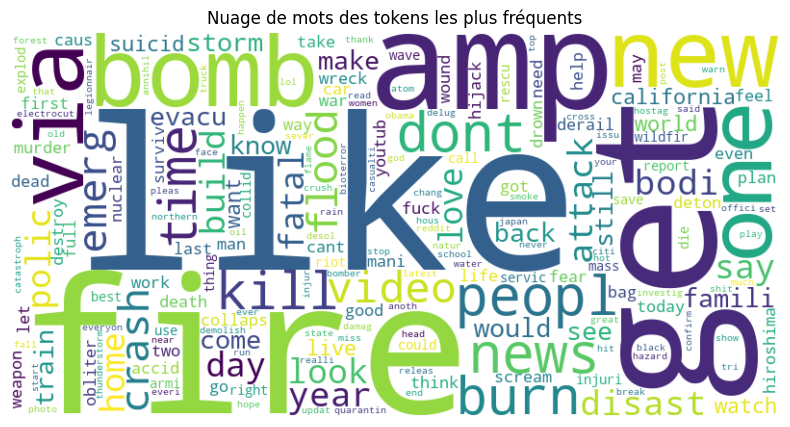

In [35]:
# Créer un WordCloud à partir du Counter

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(gram_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des tokens les plus fréquents")
plt.show()

#### Modeling

In [36]:
#Récupération des données néttoyées
texts = []
for words in stems:
    texts.append(' '.join(words))

data['text'] = texts
#data = data[['text', 'target']]
print(data)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0                deed reason earthquak may allah forgiv       1  
1                     forest fire near rong sask canada       1  
2     resid ask shelter place notifi offic evacu she...       1  
3           peopl receiv wildfir evacu order california       1  
4     got sent photo rubi alaska smoke wildfir pour ...       1  
...                                                 ...     ...  
7608     two giant crane hold bridg collaps nearbi home       1  
7609  ariaahrari thetawniest control wild fire calif...       1  
7610                 

In [37]:
# Définir X (le corpus) et y (les labels)
corpus = data['text'].astype(str).tolist()  # transforme la colonne en liste de chaînes
y = data['target'].tolist()
len(y)

7613

In [38]:
# Transformer Word2Vec compatible sklearn
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=100, window=3, min_count=1, sg=1):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.sg = sg

    def fit(self, X, y=None):
        sentences = [sentence.split() for sentence in X]  # tokenisation basique
        self.w2v_model = Word2Vec(sentences,
                                  vector_size=self.vector_size,
                                  window=self.window,
                                  min_count=self.min_count,
                                  sg=self.sg)
        return self

    def transform(self, X):
        sentences = [sentence.split() for sentence in X]
        X_vect = []
        for sentence in sentences:
            vectors = [self.w2v_model.wv[word] for word in sentence if word in self.w2v_model.wv]
            if vectors:
                vect_mean = np.mean(vectors, axis=0)
            else:
                vect_mean = np.zeros(self.vector_size)
            X_vect.append(vect_mean)
        return np.array(X_vect)


In [39]:

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.3, random_state=42)

In [40]:
# Pipeline qui combine TF-IDF + Word2Vec puis Logistic Regression
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer()),           # TF-IDF sur le texte brut
        ('w2v', Word2VecVectorizer())            # Moyenne des vecteurs Word2Vec
    ])),
    ('clf', LogisticRegression(max_iter=500))
])

# Entraînement
pipeline.fit(X_train, y_train)

# Prédictions
y_pred = pipeline.predict(X_test)

In [41]:
print(y_pred)

[0 0 1 ... 1 1 0]


In [42]:
for i, X_text in enumerate(X_test):
    print(f"Phrase : {X_text} --> Prédiction : {y_pred[i]}")


Phrase : new weapon caus unimagin destruct --> Prédiction : 0
Phrase : famp thing gishwh got soak delug go pad tampon thx mishacollin --> Prédiction : 0
Phrase : georgegalloway gallowaymayor ûïthe col polic catch pickpocket liverpool stree --> Prédiction : 1
Phrase : aftershock back school kick great want thank everyon make possibl great night --> Prédiction : 0
Phrase : respons trauma children addict develop defens self one decreas vulner --> Prédiction : 0
Phrase : calumso look like got caught rainstorm amaz disgust time --> Prédiction : 0
Phrase : favorit ladi came volunt meet hope join youth collis excit --> Prédiction : 0
Phrase : brianroemmel fail emv peopl want insert remov quickli like ga pump stripe reader person told crash po --> Prédiction : 0
Phrase : cant find ariana grand shirt fuck tragedi --> Prédiction : 0
Phrase : murder stori americaû first hijack --> Prédiction : 1
Phrase : akilah world news cop pull man car avoid --> Prédiction : 1
Phrase : walk plank sink ship -->

In [43]:

# les métriques
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8042907180385289
Precision: 0.8048772549500933
Recall: 0.8042907180385289
F1-score: 0.8018058291275679
